In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
#loading the dataset and viewing the first 5 rows
df = pd.read_csv('customer_data.csv')
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score,Online Purchase Count
0,1,22,15,39,5
1,2,35,25,81,12
2,3,29,19,6,3
3,4,45,45,77,15
4,5,31,40,40,9


In [4]:
#data preprocessing
data = df.drop('CustomerID',axis = 1)
data.head()

,Age,Annual Income (k$),Spending Score,Online Purchase Count
0,22,15,39,5
1,35,25,81,12
2,29,19,6,3
3,45,45,77,15
4,31,40,40,9


In [5]:
#standarizing the feature
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [11]:
#applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result,columns = ['PC1','PC2'])
print('pca_result(First Five Rows)')
print(pca_df.head())
print('Explained Variance Ratio = ',pca.explained_variance_ratio_)

pca_result(First Five Rows)
        PC1       PC2
0 -2.406358  0.380752
1  0.056346  1.388063
2 -2.799648 -1.117393
3  1.293914  0.474639
4 -0.898275 -0.458848
Explained Variance Ratio =  [0.88010665 0.09508319]


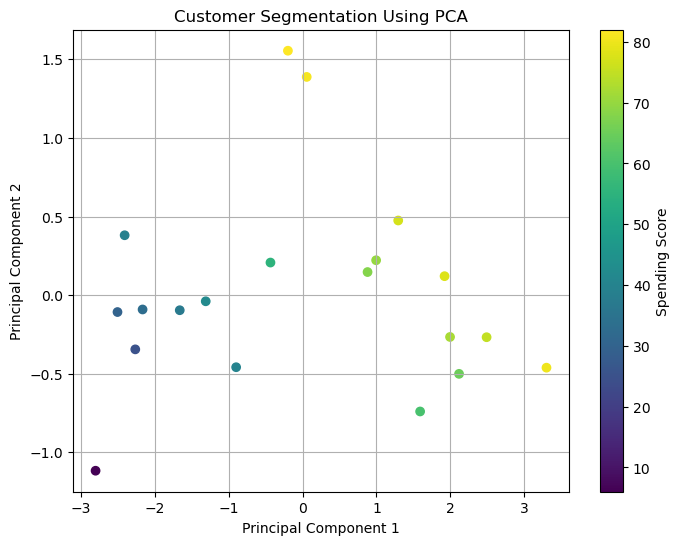

In [17]:
#visualizing the data
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    pca_df['PC1'],pca_df['PC2'],c=df['Spending Score']
,cmap = 'viridis')
plt.colorbar(scatter,label='Spending Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation Using PCA')
plt.grid(True)

In [19]:
#Merge PCA result with original data
final_df = pd.concat([df,pca_df],axis=1)
final_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score,Online Purchase Count,PC1,PC2
0,1,22,15,39,5,-2.406358,0.380752
1,2,35,25,81,12,0.056346,1.388063
2,3,29,19,6,3,-2.799648,-1.117393
3,4,45,45,77,15,1.293914,0.474639
4,5,31,40,40,9,-0.898275,-0.458848


In [23]:
print('Insight Result')
print('1:PC1 explains {:.2f}% of variance .'.format(pca.explained_variance_ratio_[0]*100))
print('2:PC2 explains {:.2f}% of variance .'.format(pca.explained_variance_ratio_[1]*100))

Insight Result
1:PC1 explains 88.01% of variance .
2:PC2 explains 9.51% of variance .
